# Debug: TemporalLayer Visualizer
This notebook creates a minimal TemporalLayer from an InitPlus block and visualizes it in 3D using the new visualizer.

In [1]:
# Imports
from lspattern.blocks import InitPlus
from lspattern.template.base import RotatedPlanarTemplate
from lspattern.visualizers.temporallayer import visualize_temporal_layer
from lspattern.canvas2 import TemporalLayer

d = 3
kind = ("Z", "X", "X")  # (X, Y, Z) faces

# Build a block with a template and materialize its local graph
tmpl = RotatedPlanarTemplate(d=d, kind=kind)
blk = InitPlus(d=d, kind=kind, template=tmpl)
blk.materialize()
len(blk.node2coord), len(blk.graph_local.physical_nodes)


(87, 87)

In [2]:
blk.kind, blk.template, blk.boundary_spec

(('Z', 'X', 'X'),
 RotatedPlanarTemplate(d=3, kind=('Z', 'X', 'X'), data_coords=[(0, 0), (2, 0), (4, 0), (0, 2), (2, 2), (4, 2), (0, 4), (2, 4), (4, 4)], data_indices=[], x_coords=[(1, -1), (3, 1), (1, 3), (3, 5)], z_coords=[(1, 1), (5, 1), (-1, 3), (3, 3)]),
 None)

In [3]:
blk.schedule_local

[(0, {9, 10, 11, 12}),
 (1, {0, 1, 2, 3, 4, 5, 6, 7, 8}),
 (2, {22, 23, 24, 25}),
 (3, {13, 14, 15, 16, 17, 18, 19, 20, 21}),
 (4, {35, 36, 37, 38}),
 (5, {26, 27, 28, 29, 30, 31, 32, 33, 34}),
 (6, {48, 49, 50, 51}),
 (7, {39, 40, 41, 42, 43, 44, 45, 46, 47}),
 (8, {61, 62, 63, 64}),
 (9, {52, 53, 54, 55, 56, 57, 58, 59, 60}),
 (10, {74, 75, 76, 77}),
 (11, {65, 66, 67, 68, 69, 70, 71, 72, 73})]

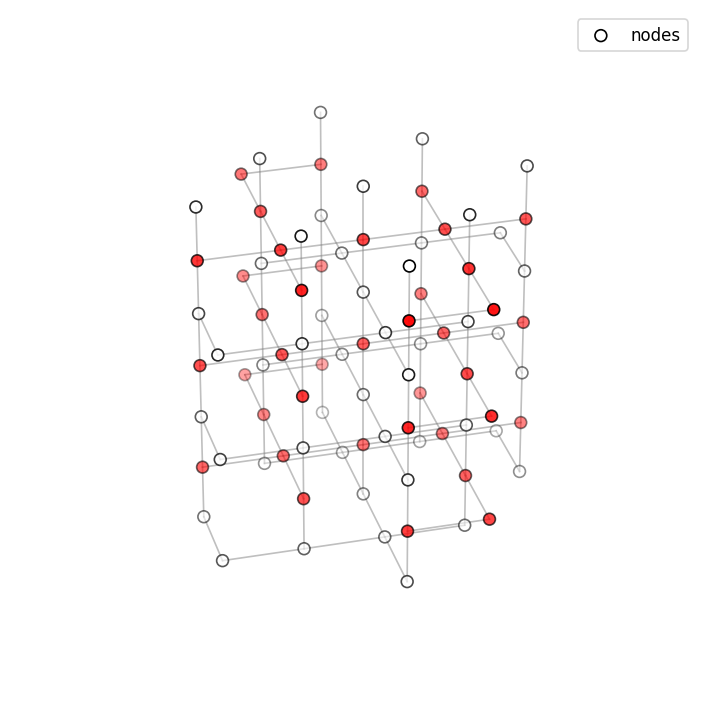

(<Figure size 720x720 with 1 Axes>,
 <Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>)

In [4]:
# Build a TemporalLayer and attach the block's geometry/graph
layer = TemporalLayer(z=0)
layer.local_graph = blk.graph_local
layer.node2coord = dict(blk.node2coord)
layer.coord2node = {coord: nid for nid, coord in layer.node2coord.items()}

# Visualize with parity-matched coloring (white/red for DATA, blue X-anc, green Z-anc)
visualize_temporal_layer(layer, annotate=False)


In [5]:
# Plotly interactive visualization (colors/hover like visualize_initialize2)
from lspattern.visualizers.plotly_temporallayer import visualize_temporal_layer_plotly

fig = visualize_temporal_layer_plotly(
    layer, node_roles=getattr(blk, "node2role", None), show_edges=True
)
fig.show()


# Multi Block visualization

In [ ]:
from lspattern.blocks.base import RHGBlock2
from lspattern.blocks import InitPlus, MeasureX, Memory
from lspattern.canvas2 import RHGCanvas2
from lspattern.mytype import PatchCoordGlobal3D, PipeCoordGlobal3D

canvas = RHGCanvas2("Memory X")

blocks = [
    (PatchCoordGlobal3D((0, 0, 0)), InitPlus(kind=("Z","X","X"))),
]
pipes = []

for block in blocks:
    canvas.add_block(*block)
for pipe in pipes:
    canvas.add_pipe(*pipe)

# layers = canvas.to_temporal_layers()
canvas

RHGCanvas2(name='Memory X', block3d={(0, 0, 0): InitPlus(index=0, d=3, graph_local=<graphix_zx.graphstate.GraphState object at 0x00000288197EEE90>, origin=(0, 0, 0), kind='ZXX', boundary_spec=None, template=RotatedPlanarTemplate(d=3, kind=('X', 'X', 'Z'), data_coords=[], data_indices=[], x_coords=[], z_coords=[]), schedule_local=[], flow_local={}, in_ports=set(), out_ports=set(), cout_ports=[], node2coord={}, coord2node={}, node2role={}, x_checks=[], z_checks=[])}, pipe3d={}, layers=None)

In [7]:
layers = canvas.to_temporal_layers()

ValueError: Template kind mismatch

In [ ]:
layers[0]

In [ ]:
layers[0].local_graph

C:\Users\internal\Documents\GitHub\ls-pattern-compile\lspattern\visualizers\temporallayer.py:109: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



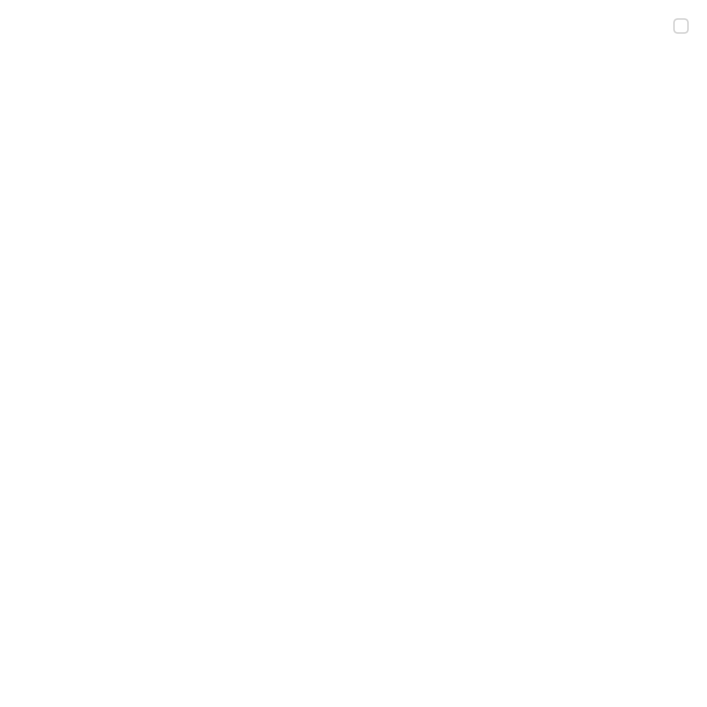

AttributeError: 'tuple' object has no attribute 'show'

In [ ]:
# Plotly interactive visualization (colors/hover like visualize_initialize2)
from lspattern.visualizers.plotly_temporallayer import visualize_temporal_layer_plotly

fig = visualize_temporal_layer(layers[0])
fig.show()
